# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [51]:
df = pd.read_csv('../data/states_edu.csv')
df.head()
#Loads dataset and outputs the head of the data

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [52]:
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL_NCES',
    'ENROLL':'ENROLL_ALL_CENSUS'
    },
    axis=1,inplace=True)
#Renames certain columns on the table

df["ENROLL_ALL_CENSUS"] = df["ENROLL_ALL_CENSUS"].fillna(df["ENROLL_ALL_NCES"])
#Fills in NaN values in ENROLL_ALL_CENSUS column with data from "ENROLL_ALL_NCES"

df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL_ALL_CENSUS,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,ENROLL_4,ENROLL_8,ENROLL_12,ENROLL_PRIMARY,ENROLL_HS,ENROLL_ALL_NCES,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,731634.0,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,122487.0,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,673477.0,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,441490.0,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,5254844.0,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: *AVG_Math_8_Score*

How many years of data are logged in our dataset? 

In [53]:
print(df["YEAR"].nunique())
#Prints number of unique years listed in the table

33


Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

In [106]:
df_ = df.set_index('STATE')
michigan_is_higher = df_.loc["MICHIGAN"]["AVG_MATH_8_SCORE"].mean() > df_.loc["OHIO"]["AVG_MATH_8_SCORE"].mean()
#Creates boolean value to describe whether Michigan or Ohio has higher scores

if (michigan_is_higher):
    print("Michigan has higher 8th grade math scores.")
else:
    print("Ohio has higher 8th grade math scores.")

Ohio has higher 8th grade math scores.


Find the average for your outcome score across all states in 2019

In [75]:
years = df.groupby("YEAR")
avg_for_years = years["AVG_MATH_8_SCORE"].mean()
#Creates a Pandas series containing the average score for each year, including 2019

avg_for_years = avg_for_years.to_numpy()
avg_for_2019 = avg_for_years[32]
#Converts series into array, and indexing allows us to obtain average for 2019

print(avg_for_2019)

281.2641509433962


Find the maximum outcome score for every state. 

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [58]:
states = df.groupby("STATE")
states["AVG_MATH_8_SCORE"].max()
#Finds max math 8 score for each state

STATE
ALABAMA                 269.0
ALASKA                  283.0
ARIZONA                 283.0
ARKANSAS                279.0
CALIFORNIA              277.0
COLORADO                292.0
CONNECTICUT             289.0
DELAWARE                284.0
DISTRICT_OF_COLUMBIA    269.0
DODEA                   293.0
FLORIDA                 281.0
GEORGIA                 281.0
HAWAII                  281.0
IDAHO                   287.0
ILLINOIS                285.0
INDIANA                 288.0
IOWA                    286.0
KANSAS                  290.0
KENTUCKY                282.0
LOUISIANA               273.0
MAINE                   289.0
MARYLAND                288.0
MASSACHUSETTS           301.0
MICHIGAN                280.0
MINNESOTA               295.0
MISSISSIPPI             274.0
MISSOURI                286.0
MONTANA                 293.0
NATIONAL                285.0
NEBRASKA                288.0
NEVADA                  278.0
NEW_HAMPSHIRE           296.0
NEW_JERSEY              296.0
NEW_

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [77]:
df['SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT'] = df['SUPPORT_SERVICES_EXPENDITURE'] / df['ENROLL_ALL_CENSUS']
df['INSTRUCTION_EXPENDITURE_PER_STUDENT'] = df["INSTRUCTION_EXPENDITURE"] / df['ENROLL_ALL_CENSUS']
#Creates two new columns containing data for support services and instruction expenditure per student

PRIMARY_KEY                                  object
STATE                                        object
YEAR                                          int64
ENROLL_ALL_CENSUS                           float64
TOTAL_REVENUE                               float64
FEDERAL_REVENUE                             float64
STATE_REVENUE                               float64
LOCAL_REVENUE                               float64
TOTAL_EXPENDITURE                           float64
INSTRUCTION_EXPENDITURE                     float64
SUPPORT_SERVICES_EXPENDITURE                float64
OTHER_EXPENDITURE                           float64
CAPITAL_OUTLAY_EXPENDITURE                  float64
ENROLL_PREK                                 float64
ENROLL_KINDER                               float64
ENROLL_4                                    float64
ENROLL_8                                    float64
ENROLL_12                                   float64
ENROLL_PRIMARY                              float64
ENROLL_HS   

Feature engineering justification: **Different states are different sizes and will therefore enroll varying amount of students in each grade. Bigger states with more students should have higher expenditures on education if all possible. Thus, I chose to add two new columns that calculated the support and instruction expenditures per student, believing that there is a positive correlation between support/instruction expenditures per student and 8th grade math scores.**

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1 & 2**

Text(0, 0.5, '8th Grade Math Score')

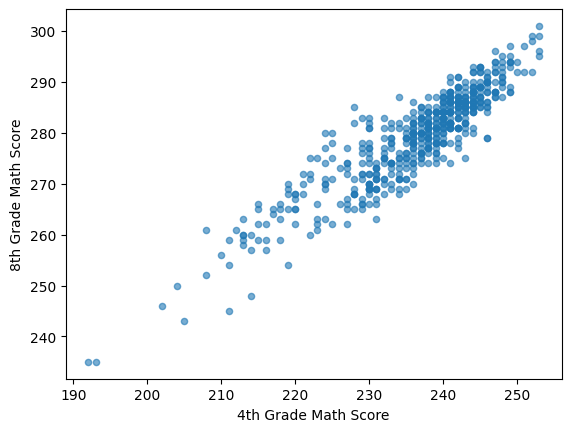

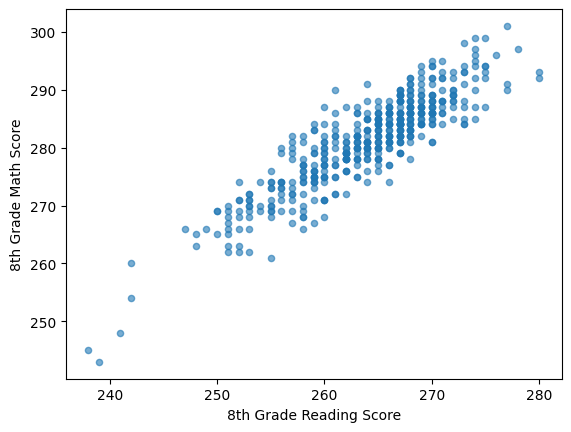

In [83]:
df.plot.scatter(x='AVG_MATH_4_SCORE', y='AVG_MATH_8_SCORE', alpha=0.6)
plt.xlabel('4th Grade Math Score')
plt.ylabel('8th Grade Math Score')
#This outputs the first plot, comparing 4th grade math scores and 8th grade math scores.

df.plot.scatter(x='AVG_READING_8_SCORE', y='AVG_MATH_8_SCORE', alpha=0.6)
plt.xlabel('8th Grade Reading Score')
plt.ylabel('8th Grade Math Score')
#This outputs the second plot, comparing 8th grade reading scores and 8th grade math scores.

**The first plot shows the relationship between 4th grade and 8th grade math scores, which seems to be a strong positive correlation. The second plot shows the relationship between 8th grade reading and math scores, which again looks like a strong positive correlation.**

**Visualization 3 & 4**

Text(0, 0.5, '8th Grade Math Score')

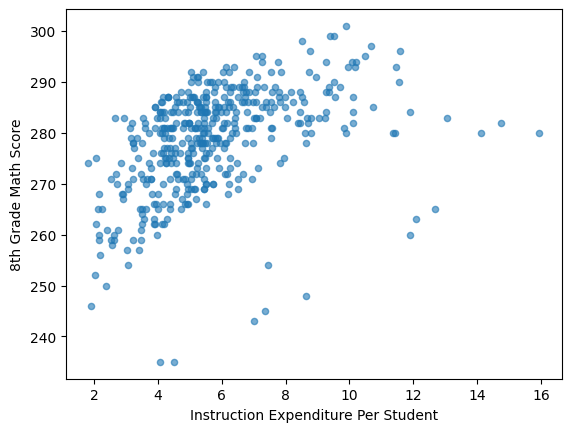

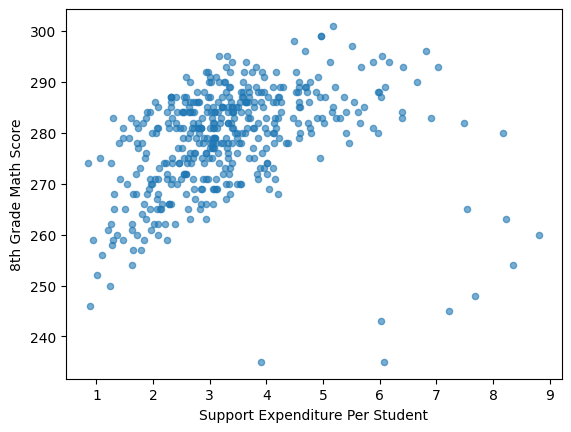

In [82]:
df.plot.scatter(x='INSTRUCTION_EXPENDITURE_PER_STUDENT', y='AVG_MATH_8_SCORE', alpha=0.6)
plt.xlabel('Instruction Expenditure Per Student')
plt.ylabel('8th Grade Math Score')
#This outputs the third plot, comparing instruction expenditure per student and 8th grade math scores.

df.plot.scatter(x='SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT', y='AVG_MATH_8_SCORE', alpha=0.6)
plt.xlabel('Support Services Expenditure Per Student')
plt.ylabel('8th Grade Math Score')
#This outputs the fourth plot, comparing support services expenditure per student and 8th grade math scores.

**The third plot shows the relationship between instruction expenditure per student and 8th grade math scores, which seems to be a moderate positive correlation. There are some impactful outliers in the data, however. The second plot shows the relationship between support services expenditure per student and 8th grade math scores, which again looks like a moderate positive correlation.**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
X = df[['INSTRUCTION_EXPENDITURE_PER_STUDENT','AVG_MATH_4_SCORE','AVG_READING_8_SCORE']].dropna()
y = df.loc[X.index]['AVG_READING_8_SCORE']
#Defines X and y variables to train the data

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)
#Splits X and y into testing and training variables

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [87]:
from sklearn.linear_model import LinearRegression

In [88]:
#Create Regression Model
model = LinearRegression()

In [89]:
model.fit(X_train, y_train)

LinearRegression()

In [105]:
y_pred = model.predict(X_test)
#Creates array containing predictions of the model

numpy.ndarray

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [97]:
# Print the intercepts and coefficients the model generates
print(model.intercept_)
print(model.coef_)

r_squared = model.score(X_test, y_test)
# Outputs R^2 value to describe how well the linear model fits the data

# mean absolute error
mean_abs_err = np.mean(np.abs(model.predict(X_test)-y_test))

# root mean squared error -- penalizes large errors
root_mean_abs_err = np.mean((model.predict(X_test)-y_test)**2)**0.5

print("R^2: " + str(r_squared))
print("Mean Absolute Error: " + str(mean_abs_err))
print("Root Mean Squared Error: " + str(root_mean_abs_err))

-5.684341886080802e-14
[-1.60974580e-16  2.22044605e-16  1.00000000e+00]
R^2: 1.0
Mean Absolute Error: 0.0
Root Mean Squared Error: 0.0


We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

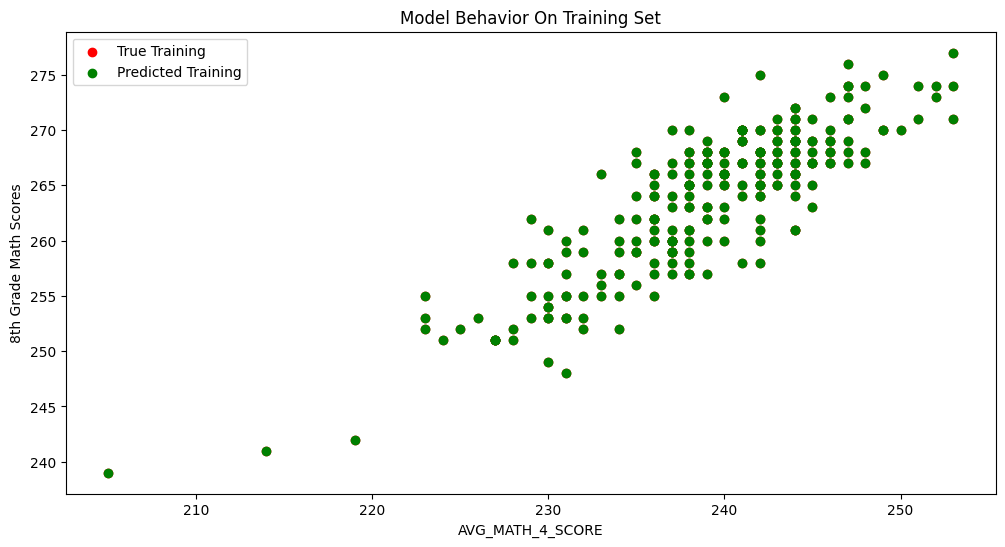

In [103]:
col_name = 'AVG_MATH_4_SCORE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('Avg. 8th Grade Math Scores')
plt.title("Model Behavior On Training Set")
#Creates scatter plot visualizing model's performance on training set

Text(0.5, 1.0, 'Model Behavior on Testing Set')

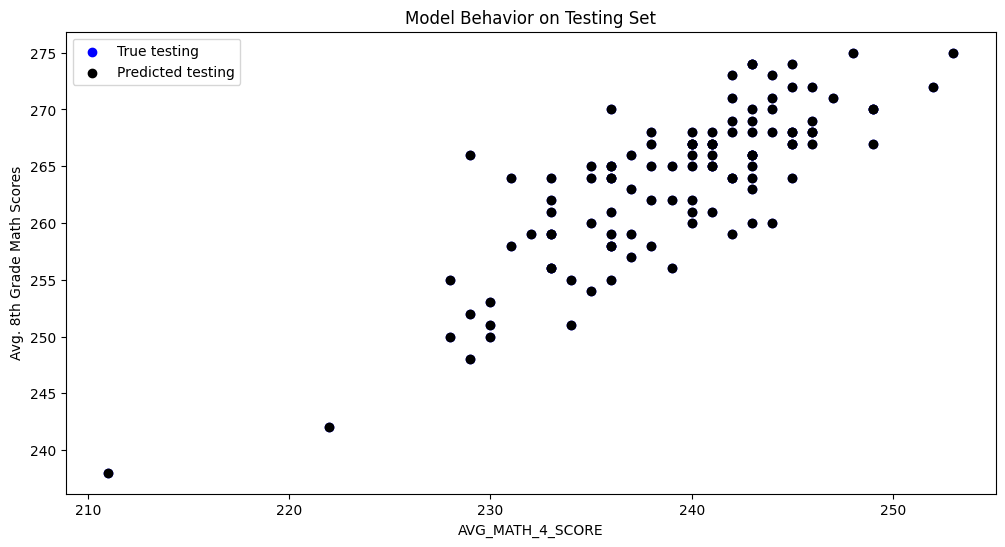

In [104]:
col_name = 'AVG_MATH_4_SCORE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('Avg. 8th Grade Math Scores')
plt.title("Model Behavior on Testing Set")
#Creates scatter plot visualizing model's performance on testing set

<h2> Summary </h2>

**My investigation revolved around average 8th-grade math scores in U.S. states across over 33 years of collected data. I plotted scatter plots analyzing the correlation between avg 4th-grade math scores, avg 8th-grade reading scores, instructional expenditure per student, and support services expenditure per student and 8th-grade math scores. Avg. 4th-grade math scores and avg 8th-grade reading scores seemingly had the strongest positive correlations with the 8th-grade math scores, meaning that 8th-grade math scores were higher when a state also had high 4th-grade math scores and 8th reading scores in a particular year. The expenditure datasets also demonstrated moderate positive correlations with the 8th-grade math scores, suggesting that expenditure per student may have some impact in increasing the math 8 test scores in a state. Thus, I chose to build a linear regression model to predict 8th-grade math scores based on corresponding 4th-grade math scores, 8th-grade reading scores, and instructional expenditure per student. The correlation between instructional expenditure and 8th-grade math scores seemed almost identical to the correlation between support services expenditure and math 8 scores, so, to avoid overfitting, it was only necessary to include one of the two variables in the model. Furthermore, the data was split 70%/30% randomly into training and testing data. Overall, the trained model fits the training and test models perfectly, with an R^2 value of 1 and zero mean absolute error. This is further evidenced by the lack of deviation between the test data and the model predictions, which is shown in the above graph. However, this is probably a case of overfitting, and more test data is required to determine the true validity of the model.**